Examples of CV problems are binary classification, multiclass classification, object detection and panoptic segmentation.

The above two data classes are capable of dealing with many different types of data.

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__, torchvision.__version__

('2.5.0', '0.20.0')

### 1. Getting a dataset

Using FashionMNIST dataset for CV problem and it is of multiclass (10) classification.

In [2]:
# Setup training data
train_data = datasets.FashionMNIST(root = "data", # Where(directory) to download the data ?
                                  train = True, # Which split is wanted ?
                                  download = True, # Whether download the data or not ?
                                  transform = ToTensor(), # Tranformm wanted to be applied while downloading
                                                          # Because images come in PIL format, need them converted to tensors
                                  target_transform = None # Transform to be applied to the target (labels) of the data, if any
                                  )

test_data = datasets.FashionMNIST(root = "data", train = False, download = True, transform = ToTensor())

In [3]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

#### 1.1 Input and output shapes of a CV model

In [4]:
image.shape # The images in the dataset are grayscale.

torch.Size([1, 28, 28])

PyTorch generally accepts **NCHW** as a defalut for many operators.

However, PyTorch also tells that NHWC performs better and is considered best practice.

This should be kept in mind for larger datasets and models. Smaller ones won't have a significant effect.

In [5]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#### 1.2 Visualizing the data

torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

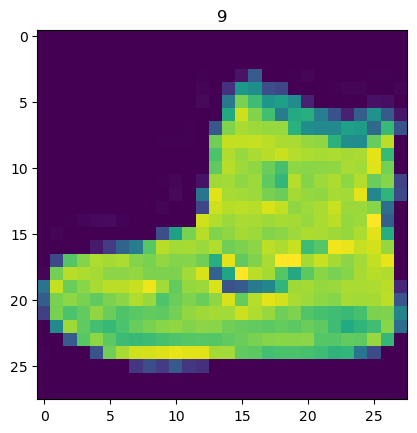

In [7]:
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze()) # Get rid of the extra dimension 1 for channels
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

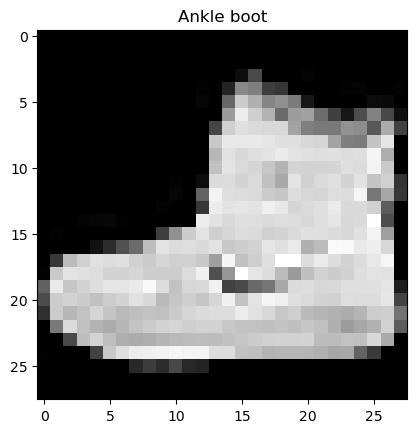

In [8]:
# The same image turned into grayscale image using  cmap parameter
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])

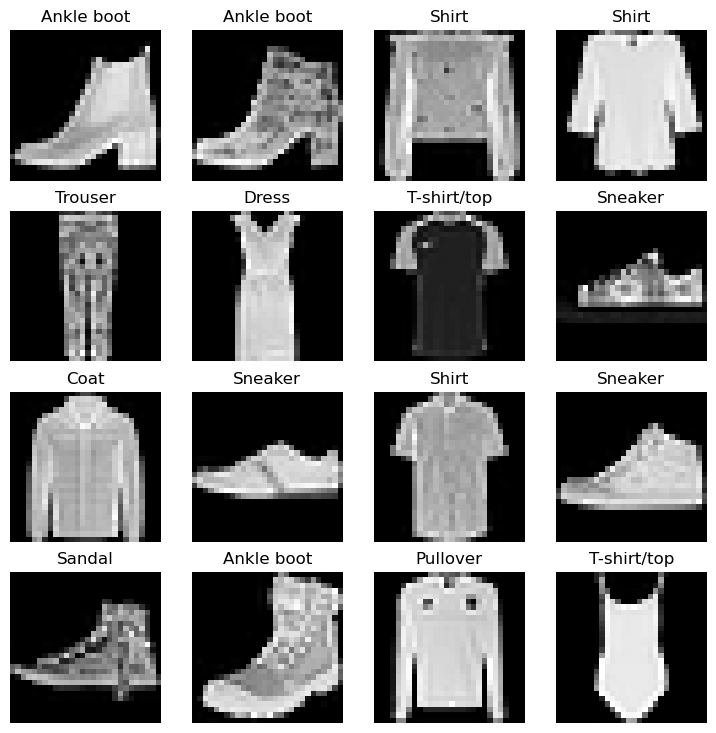

In [9]:
# A few more viewings of the data
torch.manual_seed(77)
fig = plt.figure(figsize=(9, 9))
rows, cols = (4, 4)
for i in range(1, rows * cols + 1):
    rand_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[rand_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap = 'gray')
    plt.title(class_names[label])
    plt.axis(False)

### 2. Prepare DataLoader

DataLoader helps load data into a model for training and for inference.

It provides an iterable object over large datasets in small batches or mini-batches. These can be set by the batch_size hyperparameter (powers of 2 are used oftenly).

This is done bacause it is more computationally efficient.

As a side benefit, this batching also gives the model more oppurtunities to improve.

With mini-batches, gradient descent is performed more often per epoch (once per mini-batch rather thsn once per epoch).

In [10]:
from torch.utils.data import DataLoader

# batch size hyperparam
batch_size = 32

# Dataset to iterables (batches)
train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle = True) # Shuffle data every epoch

test_dataloader = DataLoader(test_data, batch_size = batch_size, shuffle = False)

# Data checks
print(train_dataloader, test_dataloader)
print(f"{len(train_dataloader)} batches of {batch_size}")
print(f"{len(test_dataloader)} batches of {batch_size}")

<torch.utils.data.dataloader.DataLoader object at 0x0000013412F0E110> <torch.utils.data.dataloader.DataLoader object at 0x0000013410DEC450>
1875 batches of 32
313 batches of 32


In [11]:
# Check the data in the dataloaders
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])
tensor(2) torch.Size([])


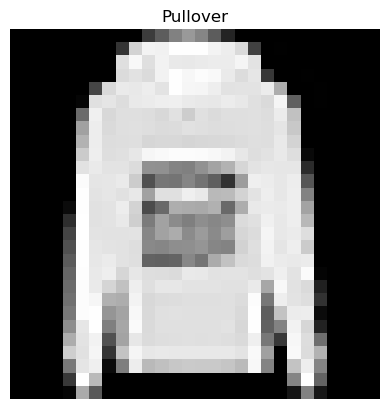

In [12]:
# Show a sample
torch.manual_seed(77)
rand_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
image, label = train_features_batch[rand_idx], train_labels_batch[rand_idx]
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis("Off")
print(image.shape)
print(label, label.shape)

### 3. Model 0: Build a baseline model

Baseline model is one of the simplest models. Use it as a starting point and subsequently improvise over it.

**nn.Flatten()** compresses the dimensions of a tensor into a single vector. From [channels, h, w] to [channels, h * w]

In [13]:
# Creating a flatten layer
flatten_model = nn.Flatten() # All n.modules function as a model

# Try on a single sample
x = train_features_batch[0]
output = flatten_model(x) # forward pass

# Print the results
print(x.shape, x)
print(output.shape, output)

torch.Size([1, 28, 28]) tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000,

This basically turns the pixel data from height and width dims into one long **feature vector**. nn.Linear likes the input in the form of feature vectors. Or, NNs like their inputs to be in vector form.

In [14]:
# Build the baseline model
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [15]:
# Instatiate the baseline model
torch.manual_seed(77)
model_0 = FashionMNISTModelV0(input_shape=784, # # input_shape is the number of features going into the model (each pixel in our case)
                              hidden_units=10,
                              output_shape=len(class_names)) # one neuron per class
model_0.to("cpu") # Beginning phase on cpu

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

#### 3.1 Setup loss, optimizer and evaluation metrics

In [16]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
from torchmetrics import Accuracy
accuracy_fn = Accuracy(task="multiclass", num_classes=10).to("cpu")
accuracy_fn

Accuracy()

#### 3.2 Creating a function to time the experiments

In [17]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device=None):
    # prints the difference between start and end times
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

#### 3.3 Creating a training loop and training the model on batches of data

In [18]:
# tqdm for progress bar
from tqdm.auto import tqdm

# Start the timer
torch.manual_seed(77)
train_time_start_on_cpu = timer()

# Number of epochs
epochs = 3

# Training and testing loops creation
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")
    # Training
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader): # Extra loop over the batches
        model_0.train()
        
        # Forward Pass
        y_pred = model_0(X)

        # Calculate loss
        loss = loss_fn(y_pred, y) 
        train_loss += loss # Accumulatively add up the loss per epoch
        
        # Optimizer zero grad
        optimizer.zero_grad()

        # Backprop
        loss.backward()

        # Optimizer step
        optimizer.step()

        # Print the samples seen till now
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (avg loss per batch per epoch)
    train_loss /= len(train_dataloader)

    # Testing
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # Forward pass
            test_pred = model_0(X)

            # Calculate loss
            test_loss += loss_fn(test_pred, y) # Accumulative

            # Calculate accuracy (preds should be the same as y_true)
            test_acc += accuracy_fn(test_pred.argmax(dim=1), y)

        # Calculations on test metrics have to happen inside the context manager
        # Divide the test loss and acc by len of test dataloader (per batch)
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\nTrain Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc * 100:.2f}%\n")

# Calculate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device = str(next(model_0.parameters()).device))

C:\Users\ritis\Desktop\PyTorch-Learning\pytorch-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 33%|████████████████████████████                                                        | 1/3 [00:10<00:21, 10.74s/it]


Train Loss: 0.58936 | Test Loss: 0.50658, Test Accuracy: 82.32%

Epoch: 1
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:20<00:10, 10.13s/it]


Train Loss: 0.47594 | Test Loss: 0.47230, Test Accuracy: 83.36%

Epoch: 2
------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:30<00:00, 10.23s/it]


Train Loss: 0.45441 | Test Loss: 0.47770, Test Accuracy: 82.91%

Train time on cpu: 30.702 seconds


### 4. Make predicitons and get Model 0 results

In [19]:
# Function to evaluate all the models built (in similar ways) on the predictions made using the dataloader
torch.manual_seed(77)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, accuracy_fn, device: torch.device = None):
    '''Returns a dict containing the results of the model predicitions made.'''
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            # Forward pass
            y_pred = model(X)
            # Calculate loss and acc per batch accumulatively
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y, y_pred.argmax(dim=1))

        # Scale down to find the avg loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name" : model.__class__.__name__, # works only when model created using a class
            "model_loss" : loss.item(),
            "model_acc" : acc.item() * 100}

# Calculate model 0 results on test set
model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.477697491645813,
 'model_acc': 82.90734887123108}

### 5. Setup device agnostic-code

In [20]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

### 6. Model 1: Building a better model with non-linearity

In [21]:
# Model built with non-linearity introduced
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [22]:
# Model Instantiation
torch.manual_seed(77)
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)

# Check model target device
print(next(model_1.parameters()).device)
model_1

cuda:0


FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

#### 6.1 Setup loss, optimizer and evaluation metrics

In [23]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.1)
accuracy_fn = Accuracy(task = "multiclass", num_classes=10).to(device)
accuracy_fn

Accuracy()

#### 6.2 Creating functions for training and testing loops

In [24]:
def train_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, accuracy_fn,
              device: torch.device = device):
    train_loss =0
    train_acc = 0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # Calc loss and acc per batch on avg
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train Loss: {train_loss:.5f} | Train Acc: {train_acc * 100:.2f}%")

def test_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module, accuracy_fn, device: torch.device = device):
    test_loss = 0
    test_acc = 0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
        # Loss and metrics per batch
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss: {test_loss:.5f} | Test Acc: {test_acc * 100:.2f}%")

In [25]:
torch.manual_seed(77)

# Setup the time
train_time_start_on_gpu = timer()

epoch = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model_1, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
    test_step(model_1, test_dataloader, loss_fn, accuracy_fn, device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss: 1.34058 | Train Acc: 52.78%


 33%|████████████████████████████                                                        | 1/3 [00:17<00:35, 17.84s/it]

Test Loss: 1.21646 | Test Acc: 56.71%
Epoch: 1
-------
Train Loss: 1.12865 | Train Acc: 59.10%


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:38<00:19, 19.32s/it]

Test Loss: 1.12137 | Test Acc: 59.63%
Epoch: 2
-------
Train Loss: 1.09339 | Train Acc: 59.97%


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:57<00:00, 19.03s/it]

Test Loss: 1.12056 | Test Acc: 58.74%
Train time on cuda: 57.094 seconds


In [26]:
# Evaluation of the trained model 1
torch.manual_seed(77)
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn, device)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 1.120558738708496,
 'model_acc': 58.73602032661438}

In [27]:
# Compared with model 0 baseline results
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.477697491645813,
 'model_acc': 82.90734887123108}

The model 1 performed actually worst than model 0. It seems as if it is overfitting. **But how ?** Need to reduce it.

**Seems more like underfitting.** No?

### 7. Model 2: Building a CNN

Typical structure of a CNN:

Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer

In [28]:
# Create a CNN
class FashionMNISTModelV2(nn.Module):
    '''TinyVGG model architecture'''
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            # default stride is 1
            # in_channels is the number of input channels in the input image
            # out_channels is the number of channels produced by the convolution
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size = 3, stride = 1, padding = 1),
            # padding is either same or valid. But can be int as well for a specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x

torch.manual_seed(77)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

#### 7.1 Stepping through nn.Conv2d(), 7.2 Stepping through nn.MaxPool2d()

Mostly theoretical with a very little new code knowledge added. Just a read. Done!

In essence, lowering the dimensionality of a tensor whilst still remaining a (hopefully) significant portion of the information is the idea of nn.MaxPool3d().
Same is the story for a nn.Conv2d() layer in some sense, but not completely.

#### 7.3 Setup a loss function and optimizer for model_2

In [29]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr = 0.1)

#### 7.4 Training and testing model_2 using the train and test functions created

In [30]:
torch.manual_seed(77)

train_time_start_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n-------")
    train_step(model_2, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
    test_step(model_2, test_dataloader, loss_fn, accuracy_fn, device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2, train_time_end_model_2, device)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Epoch 0
-------
Train Loss: 0.59280 | Train Acc: 78.60%


 33%|████████████████████████████                                                        | 1/3 [00:21<00:42, 21.30s/it]

Test Loss: 0.38778 | Test Acc: 85.48%
Epoch 1
-------
Train Loss: 0.34229 | Train Acc: 87.76%


 67%|████████████████████████████████████████████████████████                            | 2/3 [00:42<00:21, 21.09s/it]

Test Loss: 0.31809 | Test Acc: 88.46%
Epoch 2
-------
Train Loss: 0.30915 | Train Acc: 88.88%


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:03<00:00, 21.14s/it]

Test Loss: 0.30972 | Test Acc: 88.94%
Train time on cuda: 63.428 seconds


In [31]:
# Getting the model 2 results using eval_model() fn
model_2_results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn, device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3097226023674011,
 'model_acc': 88.93769979476929}

### 8. Compare model results and training time

In [32]:
# Combining the model results disctionaries into a DataFrame and make inference about it
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.477697,82.907349
1,FashionMNISTModelV1,1.120559,58.736020
2,FashionMNISTModelV2,0.309723,88.937700


In [33]:
# Adding the training times to the df as well
compare_results["training timme"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training timme
0,FashionMNISTModelV0,0.477697,82.907349,30.701519
1,FashionMNISTModelV1,1.120559,58.736020,57.094213
2,FashionMNISTModelV2,0.309723,88.937700,63.427684


Text(0, 0.5, 'model')

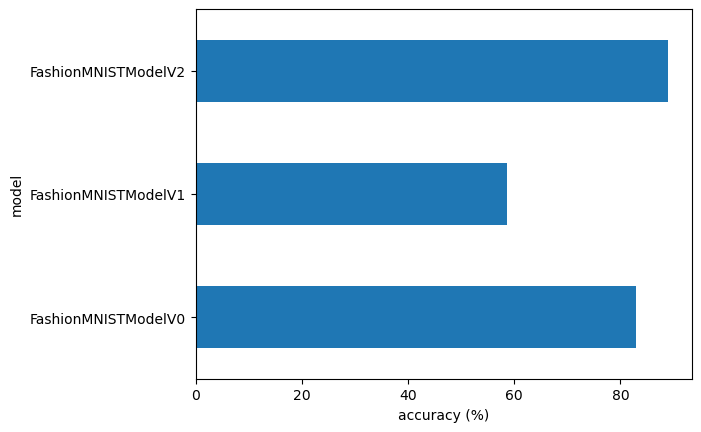

In [34]:
# Visualize the model comparison results
compare_results.set_index("model_name")["model_acc"].plot(kind = "barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

### 9. Make and evaluate random predictions with the best model

In [35]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device)
            #F Forward pass
            pred_logit = model(sample)
            # Convert to pred prob
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # perform softmax along the logits dim, not the batch dim
            pred_probs.append(pred_prob.cpu())
    # Turn list into a tensor
    return torch.stack(pred_probs)

In [36]:
import random
random.seed(77)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
    test_samples.append(sample)
    test_labels.append(label)

test_samples[0].shape, test_labels[0], class_names[test_labels[0]]

(torch.Size([1, 28, 28]), 6, 'Shirt')

In [37]:
# Predictions with model 2
pred_probs = make_predictions(model_2, test_samples)

pred_probs[:2]

tensor([[2.4576e-01, 5.3499e-06, 1.6668e-02, 1.9035e-03, 5.4242e-05, 9.3488e-06,
         7.3512e-01, 9.4249e-06, 4.6654e-04, 3.8315e-07],
        [3.9557e-05, 4.5101e-08, 2.1469e-06, 1.2123e-05, 7.1790e-05, 2.5178e-05,
         4.5308e-05, 2.0852e-05, 9.9976e-01, 1.8578e-05]])

In [38]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([6, 8, 0, 4, 2, 1, 2, 5, 6])

In [39]:
test_labels, pred_classes

([6, 8, 6, 3, 2, 1, 4, 5, 6], tensor([6, 8, 0, 4, 2, 1, 2, 5, 6]))

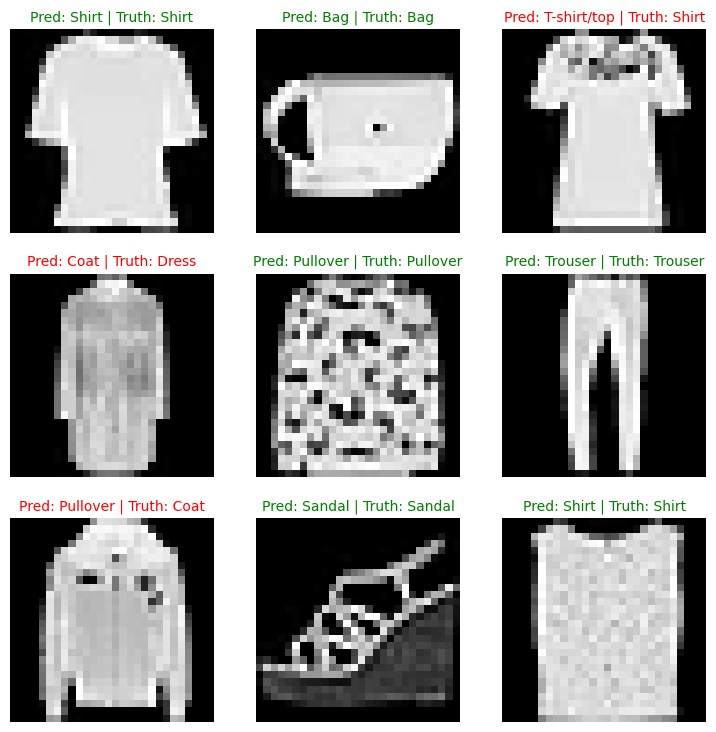

In [40]:
# Plot predicitons
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(sample.squeeze(), cmap = "gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")
    plt.axis(False)

### 10. Making a confusion matrix for further prediciton evaluation

One of the most visual evaluation metric for classification problems is **confusion matrix**.

In [41]:
# 1. Make preds using the trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions"):
        X, y = X.to(device), y.to(device)
        # Forward pass
        y_logit = model_2(X)
        # logits to pred labels
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        # Put preds on cpu for further work
        y_preds.append(y_pred.cpu())
# Convert from list to tensor by concatenation
y_pred_tensor = torch.cat(y_preds)

Making predictions: 100%|███████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 132.94it/s]


In [42]:
try:
    import torchmetrics, mlxtend
    print(mlxtend.__version__)
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(mlxtend.__version__)

0.23.4


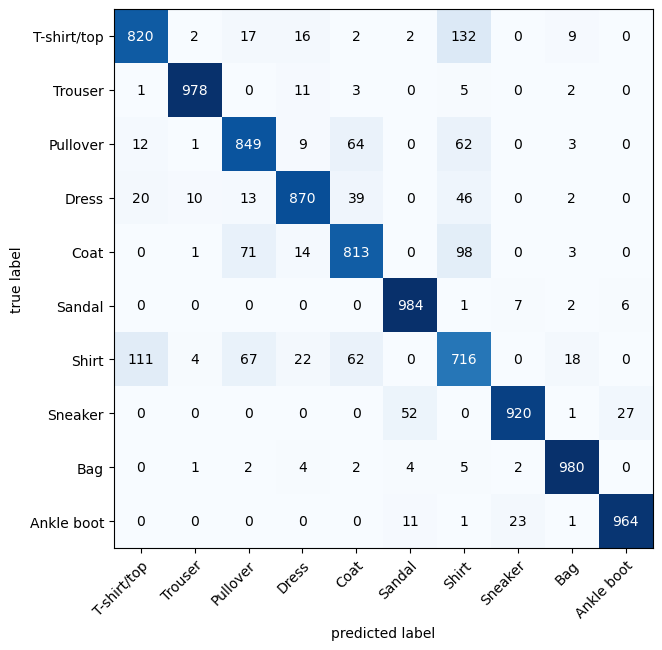

In [43]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Making the confusion matrix
conf_mat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
conf_mat_tensor = conf_mat(preds = y_pred_tensor, target = test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(conf_mat = conf_mat_tensor.numpy(), # internally uses matplotlibb and thus, using numpy
                               class_names=class_names, # row and col labels of the matric
                               figsize=(10,7))

### 11. Save and load the best performing model

In [44]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True, exist_ok = True)

MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saved model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f = MODEL_SAVE_PATH)

Saved model to models\03_pytorch_computer_vision_model_2.pth


In [45]:
loaded_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=10)

loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

loaded_model_2 = loaded_model_2.to(device)

In [46]:
# Evaluate the loaded model
torch.manual_seed(77)
loaded_model_2_results = eval_model(loaded_model_2, test_dataloader, loss_fn, accuracy_fn, device)
loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3097226023674011,
 'model_acc': 88.93769979476929}

In [47]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.3097226023674011,
 'model_acc': 88.93769979476929}

In [48]:
# Checking if the results of both the models are close to each other (being too far away may result in an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), torch.tensor(loaded_model_2_results["model_loss"]),
             atol = 1e-08, rtol = 0.0001) # Absolute tolerance, relative tolerance

tensor(True)

## Exercises

In [49]:
import torch
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [50]:
train_data_ex = datasets.MNIST(root = "data", train = True, download = True, transform = ToTensor())
test_data_ex = datasets.MNIST(root = "data", train = False, download = True, transform = ToTensor())

In [51]:
train_data_ex, test_data_ex

(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [52]:
train_data_ex[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [53]:
train_data_ex[0][0].shape

torch.Size([1, 28, 28])

In [54]:
classes = train_data_ex.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

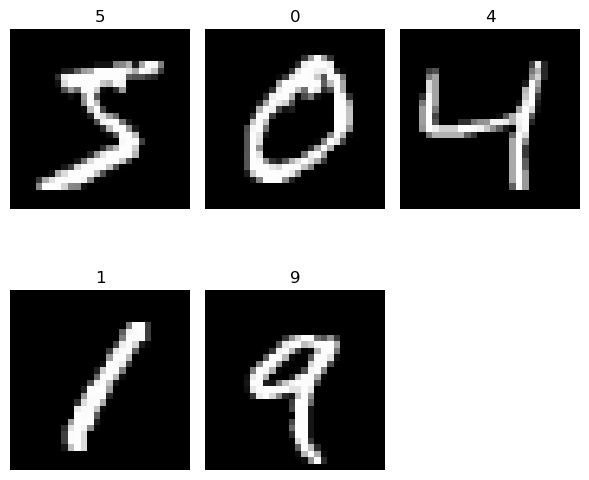

In [55]:
plt.figure(figsize=(6, 6))
for i in range(5):
    plt.subplot(2, 3, i+1)
    image = train_data_ex[i][0]
    label = train_data_ex[i][1]
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(label)
    plt.axis(False)
    plt.tight_layout()

In [56]:
train_dataloader_ex = DataLoader(train_data_ex, batch_size=32, shuffle = True)
test_dataloader_ex = DataLoader(test_data_ex, batch_size=32)

print(f"Total batches in train_datalooader: {len(train_dataloader_ex)}")
print(f"Total batches in test_dataloader: {len(test_dataloader_ex)}")

Total batches in train_datalooader: 1875
Total batches in test_dataloader: 313


In [57]:
batch1, labels1 = next(iter(train_dataloader_ex))
batch1.shape, labels1.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [58]:
class MNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride = 2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, 1, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 2, 1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        z = self.block_1(x)
        z = self.block_2(z)
        z = self.classifier(z)
        return z

model_2_ex = MNISTModelV0(input_shape=1, hidden_units=10, output_shape=len(classes)).to("cpu")
model_2_ex

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [59]:
torch.manual_seed(77)

epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2_ex.parameters(), lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=10).to("cpu")

train_time_start_model_2_ex_cpu = timer()

for epoch in range(epochs):
    print(f"{epoch+1}/{epochs} Epoch\n----------")
    train_loss, train_acc = 0, 0
    for X, y in tqdm(train_dataloader_ex, desc = "Training the model"):
        # Training
        model_2_ex.train()
        X, y = X.to("cpu"), y.to("cpu")
        y_logits = model_2_ex(X)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        loss = loss_fn(y_logits, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dataloader_ex)
    train_acc /= len(train_dataloader_ex)
    print(f"Train Loss: {train_loss:.3f}, Train Accuracy: {train_acc:.2f}")

    # Testing
    test_loss, test_acc = 0, 0
    model_2_ex.eval()
    with torch.inference_mode():
        for X, y in tqdm(test_dataloader_ex, desc="Evaluating the model"):
            X, y = X.to("cpu"), y.to("cpu")
            test_logits = model_2_ex(X)
            test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
            test_loss += loss_fn(test_logits, y)
            test_acc += accuracy_fn(y, test_pred)
        test_loss /= len(test_dataloader_ex)
        test_acc /= len(test_dataloader_ex)
        print(f"Test_loss: {test_loss:.3f}, Test Accuracy: {test_acc:.2f}\n")

train_time_end_model_2_ex_cpu = timer()
total_time_model_2_ex_on_cpu = print_train_time(train_time_start_model_2_ex_cpu, train_time_end_model_2_ex_cpu, "cpu")

1/5 Epoch
----------


Training the model: 100%|██████████████████████████████████████████████████████████| 1875/1875 [00:29<00:00, 64.11it/s]


Train Loss: 0.274, Train Accuracy: 0.91


Evaluating the model: 100%|█████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 137.08it/s]


Test_loss: 0.064, Test Accuracy: 0.98

2/5 Epoch
----------


Training the model: 100%|██████████████████████████████████████████████████████████| 1875/1875 [00:25<00:00, 72.50it/s]


Train Loss: 0.069, Train Accuracy: 0.98


Evaluating the model: 100%|█████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 138.12it/s]


Test_loss: 0.054, Test Accuracy: 0.98

3/5 Epoch
----------


Training the model: 100%|██████████████████████████████████████████████████████████| 1875/1875 [00:25<00:00, 73.20it/s]


Train Loss: 0.053, Train Accuracy: 0.98


Evaluating the model: 100%|█████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 135.52it/s]


Test_loss: 0.048, Test Accuracy: 0.98

4/5 Epoch
----------


Training the model: 100%|██████████████████████████████████████████████████████████| 1875/1875 [00:25<00:00, 73.52it/s]


Train Loss: 0.045, Train Accuracy: 0.99


Evaluating the model: 100%|█████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 138.56it/s]


Test_loss: 0.050, Test Accuracy: 0.98

5/5 Epoch
----------


Training the model: 100%|██████████████████████████████████████████████████████████| 1875/1875 [00:25<00:00, 73.44it/s]


Train Loss: 0.040, Train Accuracy: 0.99


Evaluating the model: 100%|█████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 137.75it/s]

Test_loss: 0.045, Test Accuracy: 0.98

Train time on cpu: 143.283 seconds


In [60]:
model_2_ex = MNISTModelV0(input_shape=1, hidden_units=10, output_shape=len(classes)).to(device)
model_2_ex

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [61]:
torch.manual_seed(77)

epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2_ex.parameters(), lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=10).to(device)

train_time_start_model_2_ex_gpu = timer()

for epoch in range(epochs):
    print(f"{epoch+1}/{epochs} Epoch\n----------")
    train_loss, train_acc = 0, 0
    for X, y in tqdm(train_dataloader_ex, desc = "Training the model"):
        # Training
        model_2_ex.train()
        X, y = X.to(device), y.to(device)
        y_logits = model_2_ex(X)
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
        loss = loss_fn(y_logits, y)
        train_loss += loss
        train_acc += accuracy_fn(y, y_pred)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(train_dataloader_ex)
    train_acc /= len(train_dataloader_ex)
    print(f"Train Loss: {train_loss:.3f}, Train Accuracy: {train_acc:.2f}")

    # Testing
    test_loss, test_acc = 0, 0
    model_2_ex.eval()
    with torch.inference_mode():
        for X, y in tqdm(test_dataloader_ex, desc="Evaluating the model"):
            X, y = X.to(device), y.to(device)
            test_logits = model_2_ex(X)
            test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
            test_loss += loss_fn(test_logits, y)
            test_acc += accuracy_fn(y, test_pred)
        test_loss /= len(test_dataloader_ex)
        test_acc /= len(test_dataloader_ex)
        print(f"Test_loss: {test_loss:.3f}, Test Accuracy: {test_acc:.2f}\n")

train_time_end_model_2_ex_gpu = timer()
total_time_model_2_ex_on_gpu = print_train_time(train_time_start_model_2_ex_gpu, train_time_end_model_2_ex_gpu, device)

1/5 Epoch
----------


Training the model: 100%|█████████████████████████████████████████████████████████| 1875/1875 [00:17<00:00, 106.16it/s]


Train Loss: 0.245, Train Accuracy: 0.92


Evaluating the model: 100%|█████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 136.69it/s]


Test_loss: 0.070, Test Accuracy: 0.98

2/5 Epoch
----------


Training the model: 100%|█████████████████████████████████████████████████████████| 1875/1875 [00:18<00:00, 102.66it/s]


Train Loss: 0.077, Train Accuracy: 0.98


Evaluating the model: 100%|█████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 137.86it/s]


Test_loss: 0.077, Test Accuracy: 0.98

3/5 Epoch
----------


Training the model: 100%|█████████████████████████████████████████████████████████| 1875/1875 [00:17<00:00, 105.91it/s]


Train Loss: 0.061, Train Accuracy: 0.98


Evaluating the model: 100%|█████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 142.50it/s]


Test_loss: 0.044, Test Accuracy: 0.99

4/5 Epoch
----------


Training the model: 100%|█████████████████████████████████████████████████████████| 1875/1875 [00:17<00:00, 107.47it/s]


Train Loss: 0.051, Train Accuracy: 0.98


Evaluating the model: 100%|█████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 138.38it/s]


Test_loss: 0.048, Test Accuracy: 0.98

5/5 Epoch
----------


Training the model: 100%|█████████████████████████████████████████████████████████| 1875/1875 [00:17<00:00, 107.03it/s]


Train Loss: 0.046, Train Accuracy: 0.99


Evaluating the model: 100%|█████████████████████████████████████████████████████████| 313/313 [00:02<00:00, 139.76it/s]

Test_loss: 0.050, Test Accuracy: 0.98

Train time on cuda: 100.000 seconds


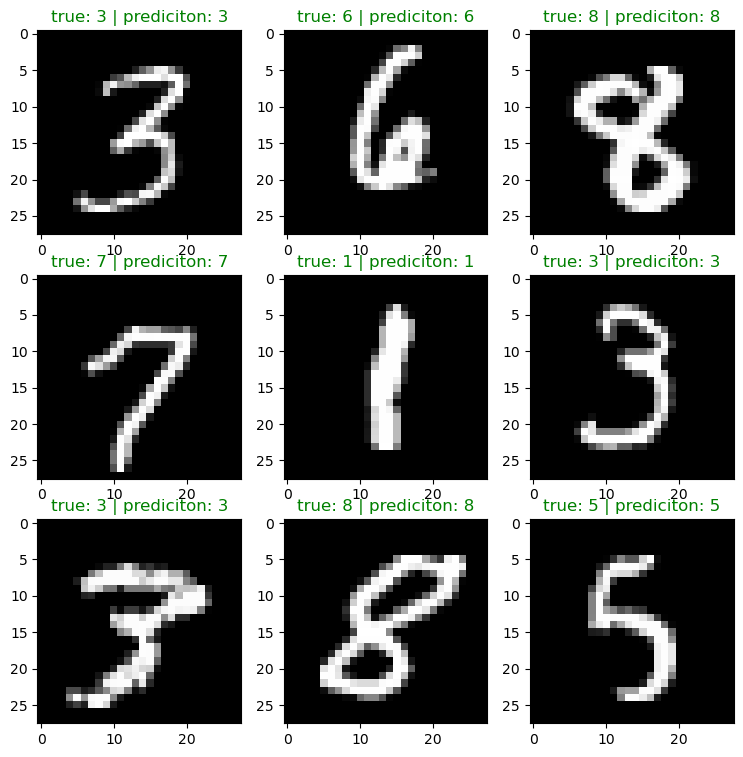

In [62]:
plt.figure(figsize=(9,9))
for i, example in enumerate(random.sample(list(test_data_ex), k = 9)):
    plt.subplot(3, 3, i+1)
    image = example[0].unsqueeze(dim=0).to(device)
    label = example[1]
    pred_label = torch.softmax(model_2_ex(image), dim=1).argmax(dim=1).item()
    plt.imshow(image.squeeze().cpu(), cmap="gray")
    title = f"true: {label} | prediciton: {pred_label}"
    if label == pred_label:
        plt.title(title, c = "g")
    else:
        plt.title(title, c = "r")

tensor([7, 2, 1,  ..., 4, 5, 6], device='cuda:0') cuda:0


(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

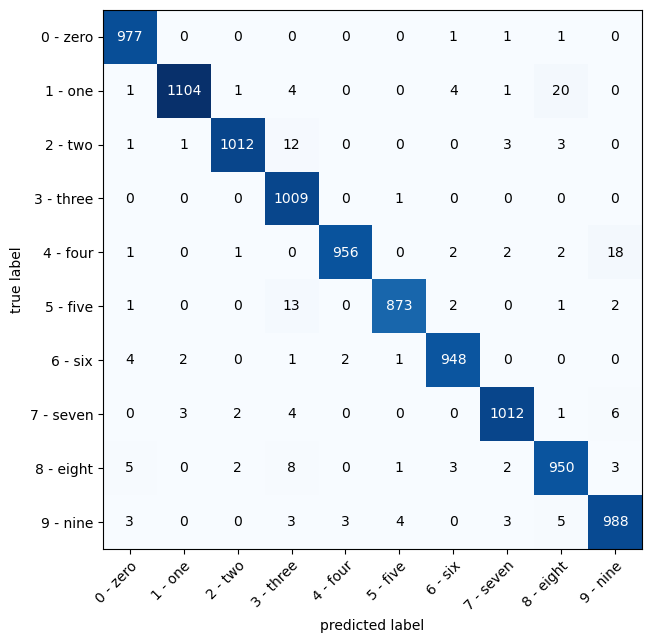

In [63]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

test_preds = []
for X, y in test_dataloader_ex:
    model_2_ex.eval()
    with torch.inference_mode():
        test_preds.append(torch.softmax(model_2_ex(X.to(device)).to(device), dim=1).argmax(dim=1))
test_preds_tensor = torch.cat(test_preds)
print(test_preds_tensor, test_preds_tensor.device)

confuion_matrix = ConfusionMatrix(task="multiclass", num_classes=10)
confmat = confuion_matrix(test_preds_tensor.cpu(), test_data_ex.targets)
plot_confusion_matrix(confmat.numpy(), class_names=classes, figsize=(10, 7))

In [64]:
random_tensor = torch.randn(size=(1, 3, 64, 64))
conv_layer = nn.Conv2d(in_channels=3, out_channels=5, kernel_size=1, stride = 1, padding=1) # 0 padding is the same as valid and 1 is same as "same"
output = conv_layer(random_tensor)
print(output.shape)

torch.Size([1, 5, 66, 66])
